<a href="https://colab.research.google.com/github/alexandretencaten/ML_MNIST/blob/main/Projeto_Boston_Housing_ML_TENCATEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto offline de aprendizado de máquina de ponta a ponta

---

**Aprendizado de Máquinas - XXII Escola de Verão - PPGMTM - UFSC**

<font color='red'>Por: Alexandre ten Caten </font>

<font color='red'>Data: 26_01_2021 </font>


Neste Notebook você irá criar modelos preditivos para o setor imobiliário.  Usaremos um conjunto de dados do setor imobiliário **The Boston Housing Dataset**. 

<font color='green'>Vamos utilizar a base de dados de imóveis de Boston onde o objetivo é predizer o valor de um novo imóvel baseado em suas características. Exceto os dados da feature "B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town" pois tem cunho racista. </font> [Ver aqui.](https://www.datasciencecentral.com/profiles/blogs/boston-housing-dataset-without-the-racial-profiling-field)

As informações mais detalhadas sobre o conjunto de dados podem ser obtidas aqui [nesse blog](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Este notebook foi construído baseando-se no [livro do Aurélien Géron](https://amzn.to/3ot9pAe) e também através do notebook do Aurélien Géron, [disponível aqui](https://github.com/ageron/handson-ml). E no exemplo fornecido pelo professor com o estudo de caso Califórnia 1990.

Exemplo de aplicação destes dados [neste blog em português](https://minerandodados.com.br/jupyter-notebook-no-azure-machine-learning/).

**Código do Livro: Hands–On Machine Learning with Scikit–Learn and TensorFlow 2e (cap2)**


#The Boston Housing Dataset

Data Set Characteristics:

Number of Instances: 506

Number of Attributes: 
13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order): 
CRIM - per capita crime rate by town;

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.;

INDUS - proportion of non-retail business acres per town;

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise);

NOX - nitric oxides concentration (parts per 10 million);

RM - average number of rooms per dwelling;

AGE - proportion of owner-occupied units built prior to 1940;

DIS - weighted distances to five Boston employment centres; 

RAD - index of accessibility to radial highways;

TAX - full-value property-tax rate per USD_10,000;

PTRATIO - pupil-teacher ratio by town;

B 1000(Bk - 0.63)^2 -where Bk is the proportion of blacks by town;

LSTAT - % lower status of the population;

MEDV - Median value of owner-occupied homes in $1000’s; --> **Median Value (attribute 14) our target - y.** 

Missing Attribute Values: None

Creator: Harrison, D. and Rubinfeld, D.L.

Fonte [scikit-learn.org](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset).

# Os principais passos de um projeto de machine learning:

1. Enquadrar o problema;

2. Obter os dados;

3. Descobrir e visualizar os dados para obter informações;

4. Preparar os dados para os algoritmos;

5. Selecionar e treinar modelos;

6. Ajustar o modelo.

Para finalizar o ciclo completo de um projeto, seriam ainda necessários:

7. Apresentar sua solução;

8. Lançar, monitorar e manter seu sistema.

Para apresentar a solução seria importante apresentar de maneira organizada e sistematizada as análises que faremos aqui neste notebook. Podería-se ainda criar uma narrativa para que esses resultados fossem apresentados à gestores ou outros profissionais interessados no assunto mas que não são especialistas no assunto.

A parte de lançamento, monitoramente e manuntenção do sistema envolve outras áreas da computação e ao longo do nosso curso estaremos abordando até a parte do deploy na nuvem, isto é, de implantar o modelo para que ele seja consumido por um usuário final. 

Como não faremos o deploy do modelo, estaremos nomeando ele de **offline** apenas para indicar que ele não estará disponível online. 



# Configuração inicial

Vamos começar importando algumas bibliotecas básicas:

*Numpy* - Pacote para computação científica em Python. [Saiba mais.](https://numpy.org/)

*os* - Diversas interfaces para sistema operacional. [Saiba mais.](https://docs.python.org/3/library/os.html)

O NumPy é extramente útil, fornecendo das mais básicas às mais avançadas técnicas de computação científica.



In [2]:
# Importações comuns
import numpy as np
import os
import pandas as pd

# Obtendo os dados

**Importa os dados The Boston Housing Dataset**

Vamos buscar os dados no *sklearn.datasets*  

In [3]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True) # vamos importar separados - depois vamos unir quando necessário
print(X.shape)

#from sklearn.datasets import load_boston
#data = load_boston(return_X_y=True)

(506, 13)


In [4]:
#data = pd.DataFrame(data=data)
print(y.shape)

(506,)


In [ ]:
y #mostra y bruto

In [ ]:
X #mostra X bruto

Vamos agora fixar o sorteio aleatório de números no nosso projeto. Observa que isso é importante para que possamos reproduzir o modelo.

In [7]:
#Para garantir estabilidade e ser mais fácil reproduzir experimento
seed = 42 #Sci-Fi movie/book: The Hitchhiker’s Guide to the Galaxy
np.random.seed(seed)

Vamos agora importar módulo básicos do [matplotlib](https://matplotlib.org/) para plotar figuras. [Confira aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html) a documentação do matplotlib.rc

In [8]:
# Para plotar figuras
#Gráficos matplotlib incluídos no notebook, ao lado do código
#a magic function -->  Line magics are prefixed with the % character
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

É comum que alarmes sejam disparados quando há algum erro interno ao rodar os códigos. Em geral é importante manter eles ligados pois podem nos ajudar a identificar possíveis erros no código. 

Por hora vamos desligar alguns warnings desnecessários relacionados ao 'internal gelsd'. Você pode conferir essa issue [aqui no GitHub](https://github.com/scipy/scipy/issues/5998). 

In [9]:
# Ignorar warnings desnecessários (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Enquadar o problema

- Qual o objetivo do problema?

- Como a empresa/cliente pretende usar o produto?

Tais perguntas são importantes pois definirá como você vai abordar o problema, que tipo de algoritmo irá usar e qual o critério utilizado para comparar os modelos (isto é, qual métrica).

Você precisará avaliar se a solução requer uma solução muito complexa, que demandará mais trabalho, tempo e dinheiro, ou se uma solução mais simples será suficiente.

 # Observações importante

- Antes de começar a trabalhar no projeto, verifique todas as hipóteses do sistema, infraestrutura disponível, linguagens de programação que serão utilizada, plataformas, etc. E mais importante: um projeto de machine learning é executado por **pessoas**, conhecer e dialogar com a equipe é indispensável;

- Certifique-se que você dispõe dos dados corretos para construir a solução que o problema exige. Fique atento as informações e à **qualidade dos dados**, isso limitará bastante a parte de modelagem. Alguns dados podem ser inviáveis de serem coletados, seja pelo seu custo ou por tempo limitado do projeto;

- Não aborde, em um primeiro momento, um problema usando a solução mais complexa possível. Otimização prematura é arriscado e pode comprometer o projeto;

- Leve em consideração que os **modelos mais complexos são mais difíceis de manter**, requer estruturas mais sofisticadas (e mais caras) e geralmente requer um corpo técnico mais qualificado - fique atento também às regulamentações dos dados;

- Comece com **protótipos rápidos** e vá conversando com o cliente obtendo retorno sobre as necessidades do produto. Já pensou passar meses desenvolvendo um produto e no final não era o que o cliente queria? A agilidade em fazer protótipos em Python torna essa linguagem muito interessante!

- As nossas visões, opiniões vão mudando com o tempo, então é natural que o cliente (e você!) vá amadurecendo ao longo do processo. **Comunicação** é a palavra chave.




Nesta etapa você deverá conhecer melhor os dados necessários ao problema. 

# Conheçendo os dados

Vamos começar visualizando as 10 primeiras linhas do dataframe **Boston Housing Dataset**:

In [10]:
#housing.head()
X = pd.DataFrame(data=X) 
X.head(10)
# falta os nomes dos FEATURES (vou corrigir isso depois!)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
# nossa TARGET --> MEDV - Median value of owner-occupied homes in $1000's
y = pd.DataFrame(data=y) 
y.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [15]:
# vou renomear as colunas do dataframe
# corrigir a posição de NOX e CHAS (é um binário de 0 ou 1) nos dados
X.rename(columns={0: 'CRIM', 1: 'ZN', 2: 'INDUS', 3: 'CHAS', 4: 'NOX', 5: 'RM', 6: 'AGE',
                  7: 'DIS', 8: 'RAD', 9: 'TAX', 10: 'PTRATIO',
                  11: 'B_1000', 12: 'LSTAT'}, # ,13: 'MEDV' --> É O TARGET
          inplace=True) #Setting the parameter inplace to True changes the original DataFrame

print(X)


        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO  B_1000  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [16]:
#renomear o 'y' também
y.rename(columns={ 0:'MEDV'},
         inplace=True) #Setting the parameter inplace to True changes the original DataFrame

print(y)

     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]



Vamos fazer então o seguinte: vamos coletar uma amostra contendo 10 instâncias para visualizar os nossos dados. Observa que esse processo envolve uma aleatoriedade, daí a importância de fixar random_state em um certo valor caso você tenha interesse em reproduzir o experimento.

In [17]:
#housing.sample(n = 10, random_state = seed)
X.sample(n = 10, random_state = seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


Vamos agora nos informar a respeito das variáveis do problemas

In [18]:
#Rápida descrição dos dados
X.info()
#There are 506 entries,
# todas com 506 non-null --> dados completos em todas as FEATURES!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B_1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
# Verificando valores missing:
X.isnull().sum() # Não há faltantes tudo em ordem!

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B_1000     0
LSTAT      0
dtype: int64

É importante também saber **como** esse dataset foi **construído**. Isso já explicamos no início deste Exercício *Boston Housing*. 




Todos as características são numéricas, exceto 

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise);


In [20]:
#housing["ocean_proximity"].value_counts()
X["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Como podemos observar, a característica "CHAS - Charles River dummy variable" é um atributo 
binário.

Vamos agora extrair algumas medidas resumo do nosso conjunto de dados.

In [21]:
X.describe() #Medidas resumo

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Alguns histogramas também são úteis para compreender o problema

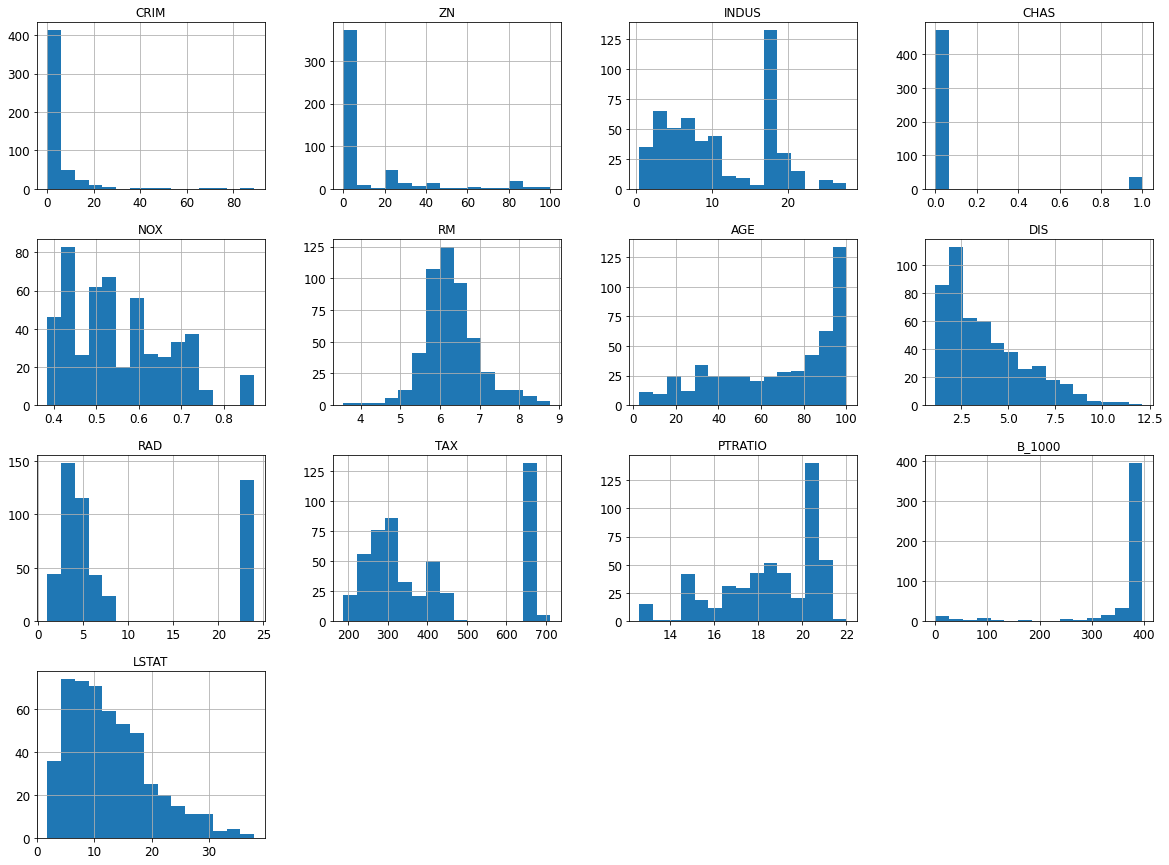

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

X.hist(bins=15, figsize=(20,15))
plt.show()
#These attributes have very different scales. 

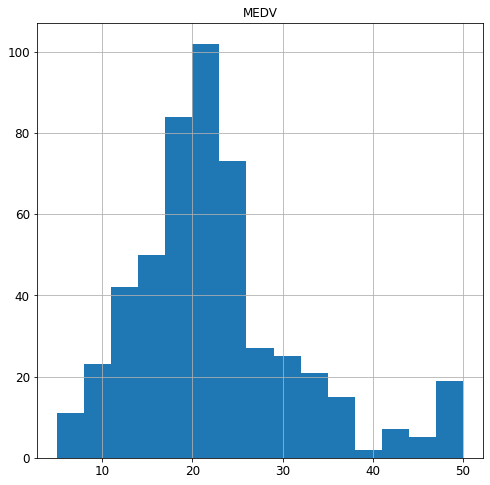

In [23]:
# histograma da target
y.hist(bins=15, figsize=(8,8))
plt.show()


#Separando o conjunto de dados

***Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.***

Se quisermos utilizar um conjunto de teste para realizar uma estimativa "não enviesada" do modelo final é importante já separarmos o conjunto de treino e teste desde já.

Observa que a função train_test_split implentada no scikit-learn tem como padrão shuffle = True. Isto quer dizer que ele irá embaralhar os dados e então fara a divisão do conjunto de dados em treino e teste. 

<font color='red'>É importante que os dados sejam embaralhados pois é comum que exista algum tipo de ordenação nos dados, de forma que se você não embaralhar os dados estará introduzindo tendencias ou vieses que não existem nos dados reais. </font>


In [24]:
# ATENÇÃO ATENÇÃO ATENÇÃO

# como foi usado ""X, y = load_boston(return_X_y=True)"" na importação agora precisa concatenar novamente
X_y = pd.concat([X,y], axis=1) 


In [25]:
X_y.describe() # ver como ficou X (as features) junto com y (labels ou a target)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
#Split arrays or matrices into random train and test subsets

from sklearn.model_selection import train_test_split

#Interessante que a divisão 80/20 é feita de uma só vez!!! Em uma só linha!!
train_set, test_set = train_test_split(X_y, 
                                       test_size=0.2, #20% para teste
                                       random_state=seed, #so that it always generates the same shuffled indices
                                       shuffle=True)      #antes de dividir ele vai aleatorizar os instances
# Cuidado com BISBILHOTAMENTO This is called data snooping bias.

In [27]:
print(train_set.shape)

(404, 14)


In [28]:
print(test_set.shape)

(102, 14)


***Essa divisão no conjunto de dados é até então puramente aleatória.***

Vejamos novamente MEDV - Median value of owner-occupied homes in $1000’s:

In [29]:
# olhando para MEDV - Median value of owner-occupied homes in $1000’s:
X_y["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [30]:
mean = np.mean(X_y["MEDV"])
mean #mean of Median value of owner-occupied homes in $1000’s


22.532806324110698

In [31]:
std = np.std(X_y["MEDV"])
std

9.188011545278206

# Visualização da estrutura de dados

Vamos agora visualizar os nossos dados. Precisamos ter certeza que não vamos visualizar dados do conjunto de teste, para evitar enviesamento de conclusões. 

De um ponto de vista mais técnico, devemos evitar o **snooping bias**.



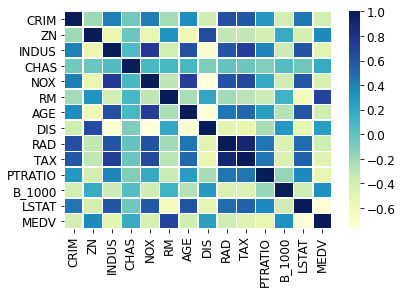

In [32]:
import seaborn as sns
# Gráfico de correlação de todas as colunas do DataFrame:

correlacoes = X_y.corr().round(2)

sns.heatmap(data=correlacoes, annot=False, linewidths=.5, cmap="YlGnBu")
plt.show()

In [33]:
# Outra forma (bem mais interessante) de visualizar as relações nos dados
X_y.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT,MEDV
CRIM,1.0,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1.0,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.0,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1.0,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1.0,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1.0,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1.0,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1.0,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1.0,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1.0,0.46,-0.44,0.54,-0.47


Interessante ver como algumas Features são correlacionadas, ou seja, contam a mesma história! Como é o caso de INDUS x NOX.

Além disso, ver quais features são relacionadas com a target MEDV, ou seja, tem poder explicativo. Como é o caso da RM. 

In [34]:
print(correlacoes) # ver os valores
# MEDV --> correlação forte + com RM (average number of rooms per dwelling)
# MEDV --> correlação forte - com LSTAT (lower status of the population)
# etc etc etc 

         CRIM    ZN  INDUS  CHAS   NOX  ...   TAX  PTRATIO  B_1000  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -0.06  0.42  ...  0.58     0.29   -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -0.04 -0.52  ... -0.31    -0.39    0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  0.06  0.76  ...  0.72     0.38   -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00  0.09  ... -0.04    -0.12    0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  0.09  1.00  ...  0.67     0.19   -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  0.09 -0.30  ... -0.29    -0.36    0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  0.09  0.73  ...  0.51     0.26   -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -0.10 -0.77  ... -0.53    -0.23    0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -0.01  0.61  ...  0.91     0.46   -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -0.04  0.67  ...  1.00     0.46   -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -0.12  0.19  ...  0.46     1.00   -0.18   0.37 -0.51
B_1000  -0.39  0.18  -0.36  0.05 -0.38  

In [35]:
sorted(X_y) # como buscar os nomes das features

['AGE',
 'B_1000',
 'CHAS',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'MEDV',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'TAX',
 'ZN']

**Vamos utilizar PCA para conhecer melhor nossos dados**

In [37]:
# reescalando os dados
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X_y)
x = pd.DataFrame(x, columns=sorted(X_y))

In [39]:
# a PCA em si
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(x)
pca.shape

(506, 5)

In [40]:
#variancia explicada
pcamodel.explained_variance_ 

array([6.55895193, 1.65279831, 1.35157702, 0.88829539, 0.85258439])

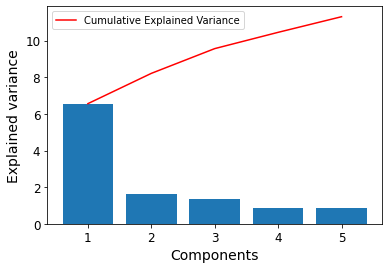

In [41]:
#variancia explicada pelas PC's em gráfico
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

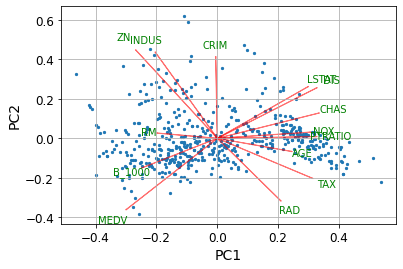

In [42]:
# uma cereja do bolo com o Biplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

plt.show()

Onde podemos ver, entre outras informações, o poder explicativo de 'LSTAT - % lower status of the population' (pela correlação negativa com MEDV). 

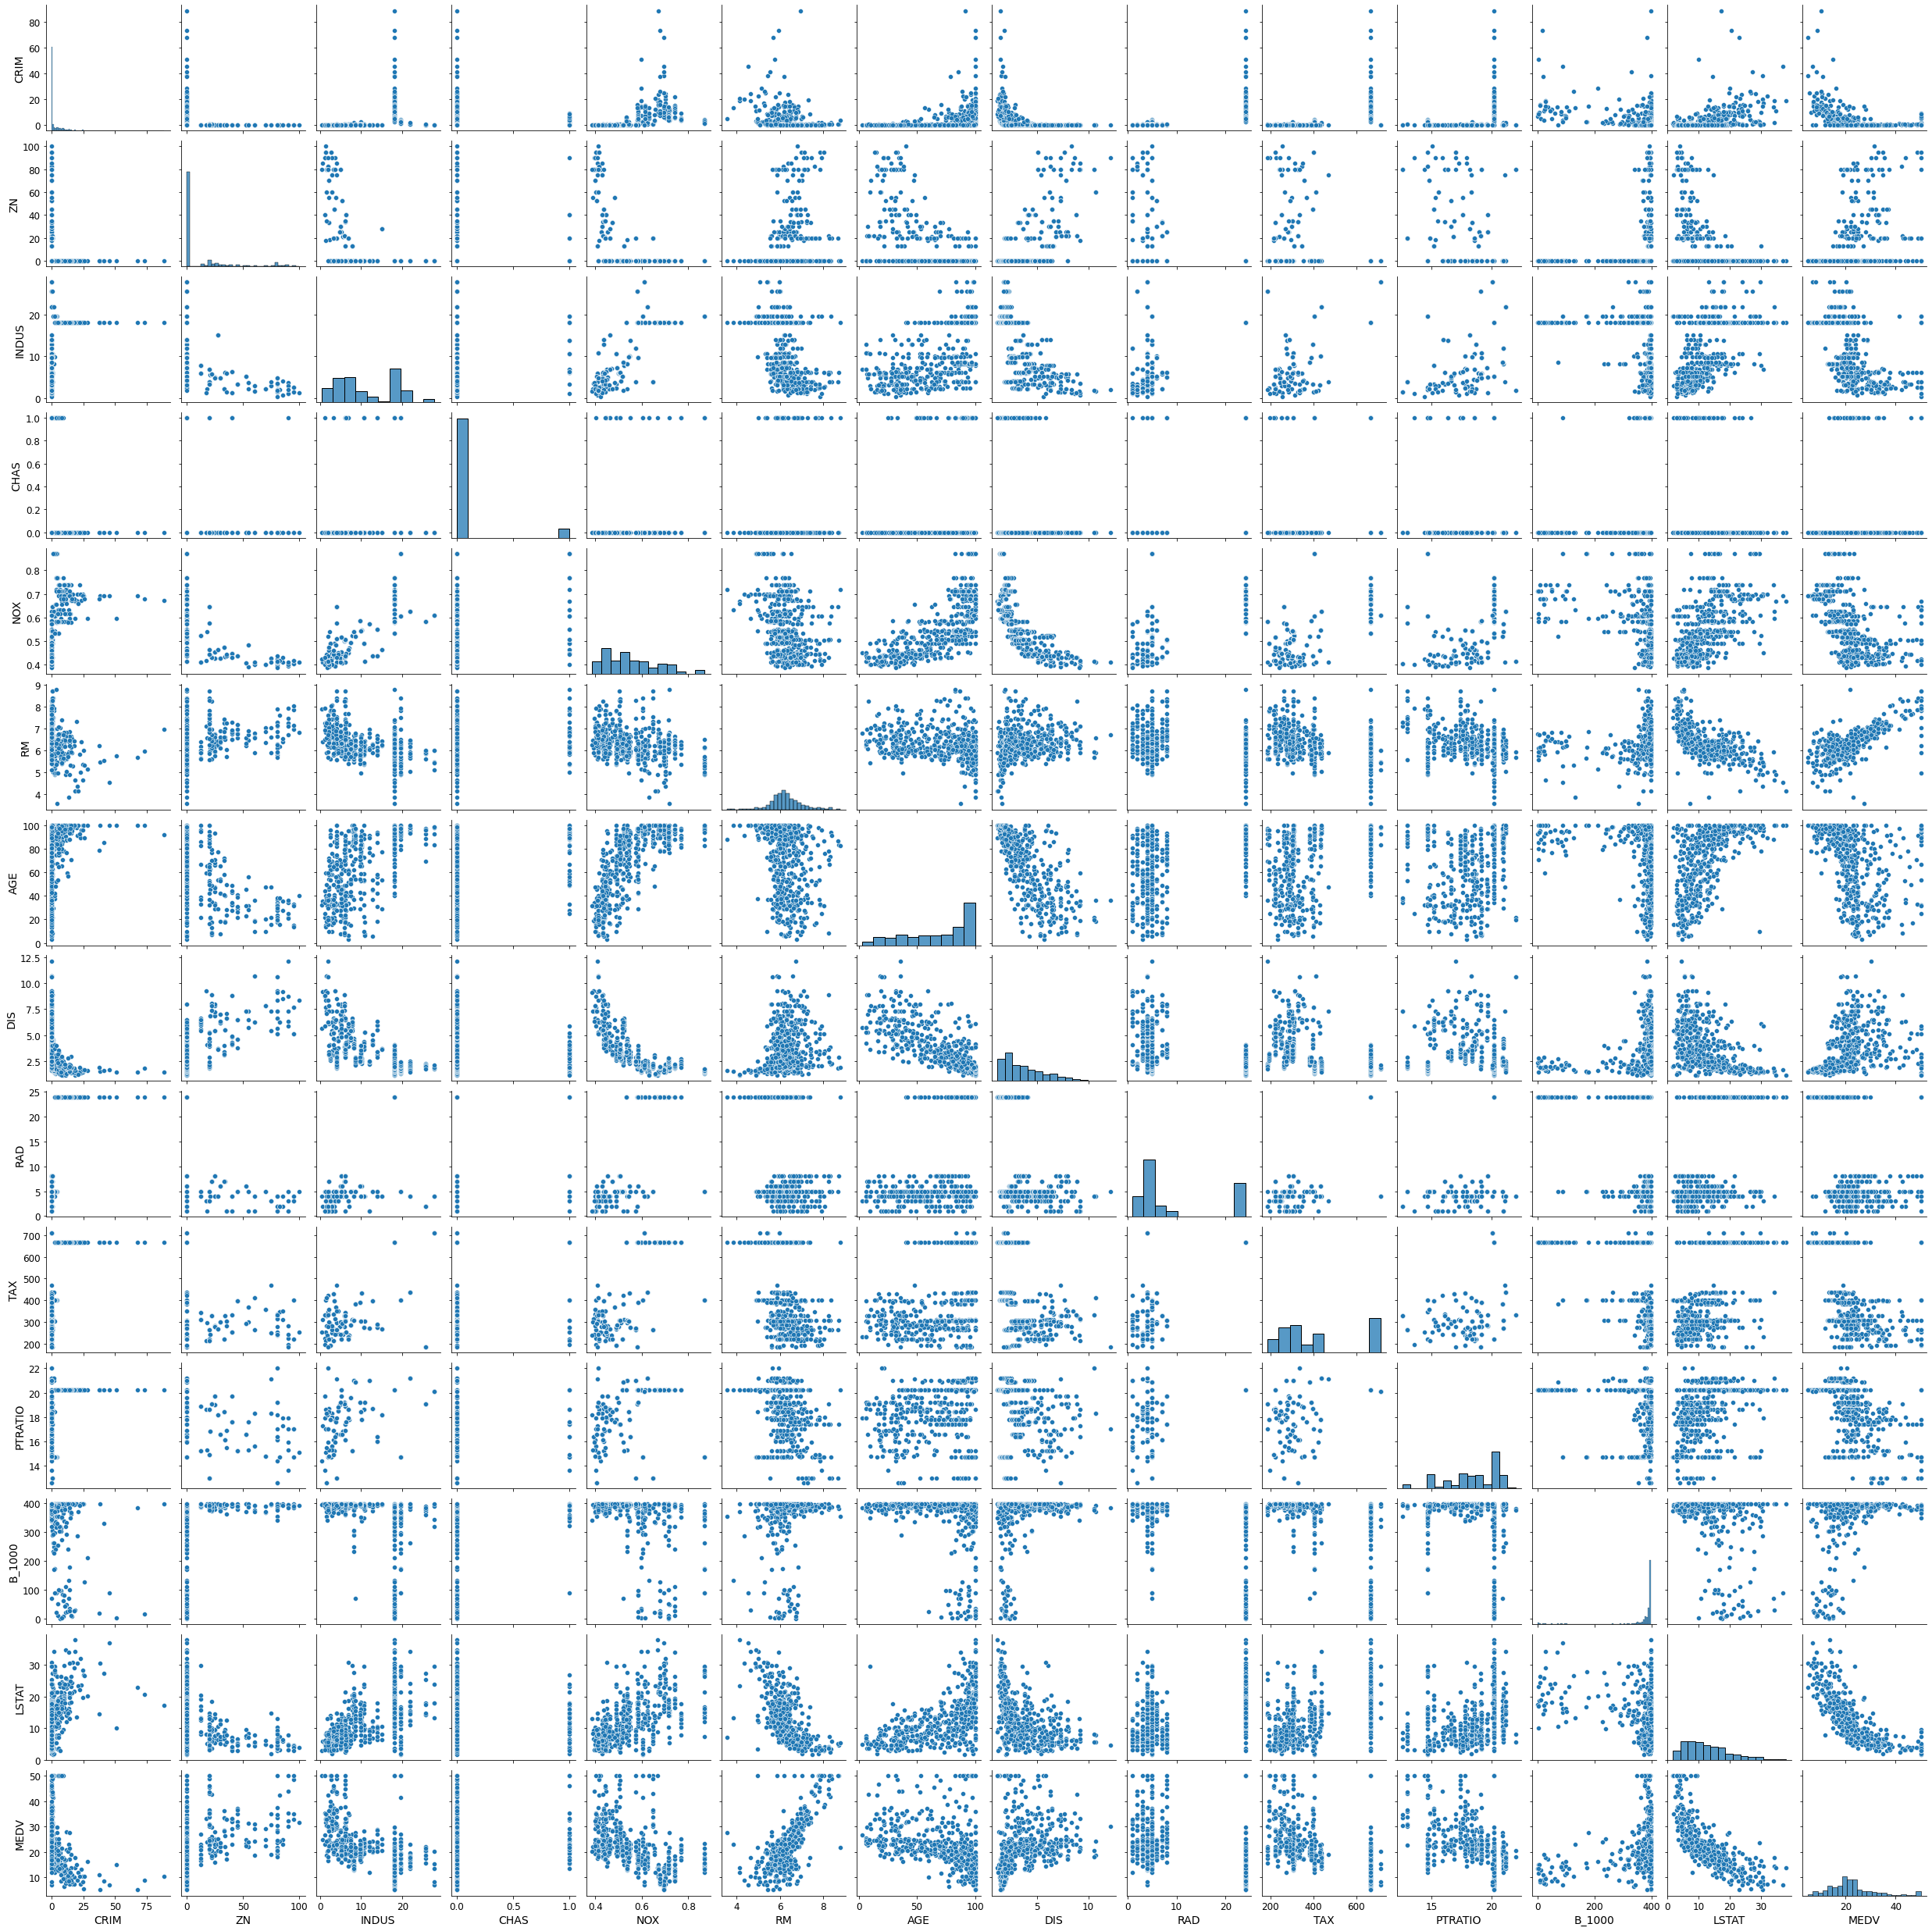

In [56]:
sns.pairplot(X_y)

#ATENÇÃO
# vai demorar e gerar uma 14 x 14 (precisa melhorar isso!!!!)

In [ ]:

# pd.plotting.scatter_matrix(X_y, alpha=0.2)
# demora e precisa melhorar a visualização também !!

In [43]:
# Vamos olhar somente as correlações com nossa target y:
#MEDV - Median value of owner-occupied homes in $1000’s

correlacoes["MEDV"].sort_values(ascending=False) #Ordenar valores em sentido decrescente

MEDV       1.00
RM         0.70
ZN         0.36
B_1000     0.33
DIS        0.25
CHAS       0.18
RAD       -0.38
AGE       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

É conveniente usar o scatter_matrix do pandas. Essa função plota cada característica em relação a outra. 

Mas claro que não faremos isso e vamos então selecionar algumas que parecem ser mais significativas:

**Dica**: Vamos aproveitar e revisar alguns [conceitos básicos de estatística](http://geam.paginas.ufsc.br/files/2020/02/Estatistica_Basica.pdf).



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f709c6d8>,
      dtype=object)

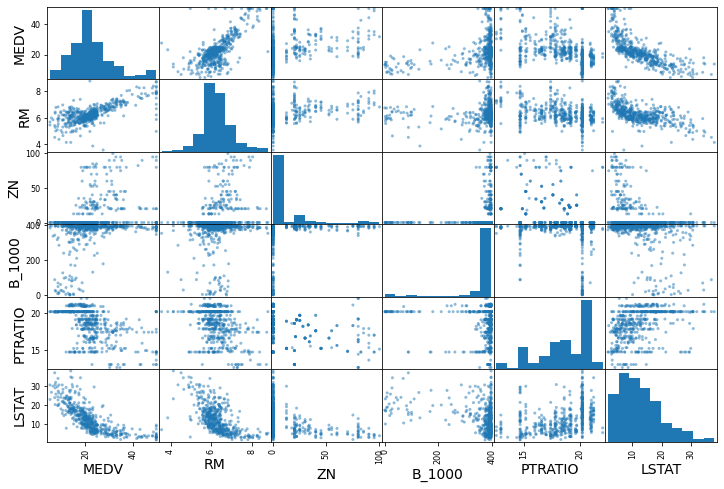

In [44]:
from pandas.plotting import scatter_matrix

#focando nas cor() mais fortes
attributes = ["MEDV", "RM", "ZN", "B_1000",
              "PTRATIO", "LSTAT"]
scatter_matrix(X_y[attributes], figsize=(12, 8))

**OBS:** Na diagonal principal da plotagem anterior não temos atributo v.s. atributo, mas sim o histograma da característica.

Vamos plotar para estudar a relação entre Feature x Target:

(0.0, 20.0, 0.0, 60.0)

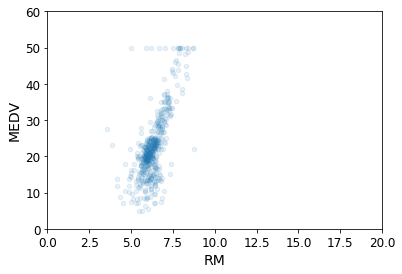

In [45]:
X_y.plot(kind="scatter", x="RM", y="MEDV",
             alpha=0.1)
plt.axis([0, 20, 0, 60])

(0.0, 60.0, 0.0, 60.0)

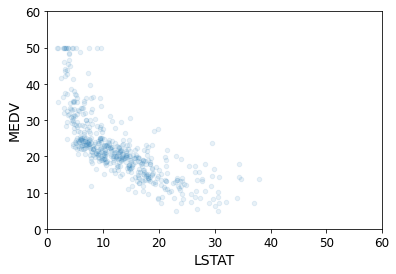

In [46]:
X_y.plot(kind="scatter", x="LSTAT", y="MEDV",
             alpha=0.1)
plt.axis([0, 60, 0, 60])

(-1.0, 2.0, 0.0, 60.0)

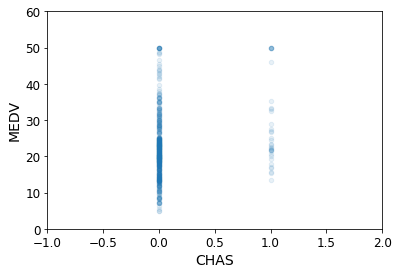

In [47]:
X_y.plot(kind="scatter", x="CHAS", y="MEDV",
             alpha=0.1)
plt.axis([-1, 2, 0, 60])

(0.0, 15.0, 0.0, 60.0)

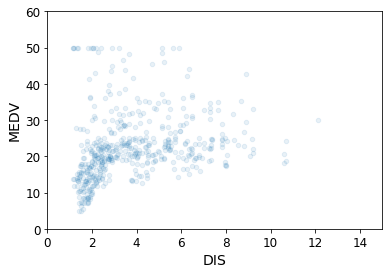

In [48]:
X_y.plot(kind="scatter", x="DIS", y="MEDV",
             alpha=0.1)
plt.axis([0, 15, 0, 60])

Informações desta plotagem: 

1.   Correlação é forte com algumas features (RM e LSTAT);

2.   Algumas features não adicionam muita informação (DIS).

#Feature Engineering

Além das colunas que o conjunto de dados nos oferece, podemos tentar construir novas características <font color = "red">**construídas de maneiras não linear**</font> com as características existentes.

De maneira geral, essa etapa requer conhecimento específico da área na qual se esta trabalhando. Daí a importância da presença de um especialista no assunto para auxiliar no projeto. 

A seguir, vamos construir algumas novas features que são mais ou menos lógicas.

In [49]:
#Nova feature: vamos tentar o quadrado das features com as correlações mais fortes
X_y["RM_LSTAT"]=(X_y["RM"] * X_y["RM"]) + (X_y["LSTAT"] * X_y["LSTAT"])



Vejamos agora a matriz de correlação de housing:

In [50]:
correlacoes = X_y.corr()
correlacoes["MEDV"].sort_values(ascending=False)

MEDV        1.000000
RM          0.695360
ZN          0.360445
B_1000      0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
RM_LSTAT   -0.606358
LSTAT      -0.737663
Name: MEDV, dtype: float64


Aparentemente, temos uma nova correlação importante produto da nossa **Feature Engineering**:

RM_LSTAT  =  -0.606358

Vejamos o gráfico:

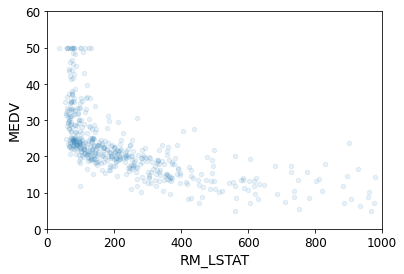

In [51]:
X_y.plot(kind="scatter", x="RM_LSTAT", y="MEDV",
             alpha=0.1)
plt.axis([0, 1000, 0, 60])

plt.show()

Vamos paroveitar para retirar a coluna "B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town" do nosso Machine Learning pois a mesma tem cunho racista, como discutido neste [link](https://www.datasciencecentral.com/profiles/blogs/boston-housing-dataset-without-the-racial-profiling-field).

Com isso vamos "abrir mão"  da correlação 
B_1000 = 0.333461.

In [52]:
#X_y = X_y.drop(['B_1000'], axis=1)
del X_y['B_1000'] #deleting a column in a DataFrame 
del train_set['B_1000'] # também do train e test set (ficou estranho assim mas em novas versões dá para melhorar)
del test_set['B_1000']

Vamos ver novamente as medidas resumos considerando as novas features!

In [53]:
X_y.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,RM_LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,250.983313
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,231.467413
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,35.328500
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,95.035889
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,166.368300
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,325.423736
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1458.843944


This round of exploration does not have to be absolutely thorough; the point is to
start off on the right foot and quickly gain insights that will help you get a first reasonably
good prototype. But this is an iterative process: once you get a prototype up
and running, you can analyze its output to gain more insights and come back to this
exploration step.


# Preparar os dados para os algoritmos de Machine Learning

ROTEIRO DE PREPARAÇÃO: 
--> Prepare the Data for Machine Learning Algorithms:
 
A) Data Cleaning

B) Handling Text and Categorical Attributes 

C) Custom Transformers 

D) Feature Scaling 

E) Transformation Pipelines (para otimizar os 4 anteriores!)


It’s time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:

• This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset);

• You will gradually build a library of transformation functions that you can reuse in future projects;

• You can use these functions in your live system to transform the new data before feeding it to your algorithms;

• This will make it possible for you to easily try various.

Precisamos incialmente retirar os rótulos do conjunto <fon color="blue"> strat_train_set </font> (mais a frente ficará claro).

Fazendo nosso X(feature) e Y(labels):

Para isso, vamos usar o método drop:

In [54]:
#housing = strat_train_set.drop("median_house_value", axis=1) # O método drop cria cópia sem a coluna em questao
X_train = train_set.drop("MEDV", axis=1)
#housing_labels = strat_train_set["median_house_value"].copy() #salvando uma cópia
X_train_labels = train_set["MEDV"].copy()
#print(X_train_labels)

**OBS:** Ao longo desta seção estaremos chamando as features de treinamento como "X_train". Atenção neste ponto para não confundir com o dataset inteiro. Isto é,
 tudo o que nos faremos aqui será feito somento no conjunto de treinamento!

A partir de agora vamos partir para etapa de <font color='blue'>**limpeza de dados!**</font>

Vamos começar verificando se temos dados falantes:

In [57]:
#housing.isnull().any(axis=1) verifica quais linhas possuem alguma célula null
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head() 
sample_incomplete_rows #nada faltante!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT


Possuímos basicamente três abordagens possíveis para lidar com os dados faltantes:

1. Excluir os quarteirões com dados faltantes;

2. Excluir toda coluna de total_bedrooms, já que é o único atributo que apresenta dados faltantes;

3. Definir algum valor para substituir total_bedrooms.

**ATENÇÃO: não será nosso casso com Boston Housing!**

Opção 3: preenchendo com algum valor - nesse caso, usaremos a mediana.

Usaremos a mediana pois queremos alguma medida simples para corrigir os dados faltantes. Ao mesmo tempo, quando comparada com a média, a mediana é mais robusta a outliers o que a torna bastante interessante.

É claro que existem técnicas mais sofisticadas, por exemplo, há [livros](https://www.amazon.com.br/Statistical-Analysis-Missing-Probability-Statistics-ebook/dp/B07Q25CNSD/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Statistical+Analysis+with+Missing+Data&qid=1610115793&s=digital-text&sr=1-1) inteiros sobre o assunto.

Se escolhermos a opção 3, devemos calular a mediana (ou qualquer outra medida que seja justificável) no <font color="red">**conjunto de treinamento**</font> e usá-lo para preencher os valores faltantes neste, mas precisamos <font color="blue">**salvar**</font> esse valor calculado.

Você precisar desse valor para mais tarde aplicar no conjunto de teste, que deverá ter seus dados faltantes corrigidos seguindo o mesmo parâmetro do conjunto de treino.

**AVISO**: No Scikit-Learn 0.20, a classe `sklearn.preprocessing.Imputer` 
foi substituida pela classe `sklearn.impute.SimpleImputer`. Então, é conviniente verificar qual versão o computador em questão está usando:

 *Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**.
Here is how to use it. First, you need to create a **SimpleImputer** instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:*

Vamos novamente revisar o nosso dataset...

In [58]:
#housing
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,23.27


Ainda temos a coluna 'CHAS' que não é numérica! 

A princípios, grande parte dos algoritmos de machine learning no computador preferem os dados representados numericamente!

Vejamos como é este dataframe:

In [87]:
#housing_tr.head()
X_train.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,11.28


**Handling Text and Categorical Attributes**

Em nosso caso temos apenas as categóricas `CHAS' binárias (números 0 e 1)

Vamos novamente visualizar os dados para relembrar:

In [60]:
X_train_cat = X_train[['CHAS']]
X_train_cat.head(10)

,CHAS
477,0.0
15,0.0
332,0.0
423,0.0
19,0.0
325,0.0
335,0.0
56,0.0
437,0.0
409,0.0


Contudo estes dados são categóricos 1 e 0. O que nos basta!!



**Standardization**

In [80]:
#Standardization of datasets is a common requirement for many machine learning estimators
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaler.mean_


array([3.60912463e+00, 1.15693069e+01, 1.09850495e+01, 7.17821782e-02,
       5.56484158e-01, 6.31589109e+00, 6.85564356e+01, 3.80819505e+00,
       9.35643564e+00, 4.04032178e+02, 1.83183168e+01, 1.24573515e+01])

In [82]:
scaler.scale_

array([8.86406744e+00, 2.31238090e+01, 6.88607935e+00, 2.58126901e-01,
       1.17558710e-01, 7.08573178e-01, 2.79602535e+01, 2.12858714e+00,
       8.57908366e+00, 1.65966869e+02, 2.22594093e+00, 7.10157559e+00])

In [83]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled


numpy.ndarray

In [88]:
X_train_scaled.shape


(404, 12)

In [89]:
X_train.shape

(404, 12)

In [86]:
type(X_train)

pandas.core.frame.DataFrame

In [90]:

type(X_train_scaled)

numpy.ndarray

In [91]:
X_train_scaled = pd.DataFrame(data=X_train_scaled)
type(X_train_scaled)

pandas.core.frame.DataFrame

In [96]:
#Scaled data has zero mean ...:
X_train_scaled.mean(axis=0)

0    -5.248827e-17
1     8.354153e-17
2    -8.656442e-18
3    -6.732788e-17
4    -5.090812e-16
5    -2.741207e-16
6    -4.858600e-16
7     4.919057e-17
8    -9.041173e-17
9    -1.534457e-16
10    8.249727e-16
11   -1.648846e-16
dtype: float64

In [95]:

#Scaled data has .... and unit variance:
X_train_scaled.std(axis=0)

0     1.00124
1     1.00124
2     1.00124
3     1.00124
4     1.00124
5     1.00124
6     1.00124
7     1.00124
8     1.00124
9     1.00124
10    1.00124
11    1.00124
dtype: float64

**ATENÇÃO: a fase de PIPELINE não está implementada aqui pois busquei simplificar o código Python para meu entendimento, e também, pela prontidão dos dados Boston Housing para a modelagem.**

Agora vamos construir um "[pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline)" (tradução literal: gasoduto) para pré-processar os atributos numéricos.

*Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator. The most common tool is a Pipeline. Pipeline is often used in combination with FeatureUnion which concatenates the output of transformers into a composite feature space.*

A ideia do pepeline é aplicar, nesta ordem, as seguintes transformações:

*   Dados faltantes são imputadas
*   Novas features são adicionadas (feature engineering)
*   As features são normalizada para que fiquem escaladas

*As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations.*

O pipeline será aprendido no conjunto de treino e depois será aplicado, usando as regras aprendidas no treinamento, no conjunto de teste.


Agora finalmente temos os nossos dados de treinamento pré-processados, assim como já temos um modelo de limpeza e tratamento de dados implentado que poderá ser aplicado no conjunto de teste.

# Selecionar e treinar um modelo

Vamos começar com um modelo simples: Regressão Linear!

In [97]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#lin_reg.fit(housing_prepared, housing_labels) 
lin_reg.fit(X_train_scaled, X_train_labels) 
#Ei Regressão linear, encontre os parâmetros que melhor aproxima os dados

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vamos agora testar o nosso pipeline de pré-processamento em algumas instâncias de treino.

- Observe que após os nossos esforços em apenas uma linhas conseguimos pré-processar os dados!

Done! You now have a working Linear Regression model. Let’s try it out on a few
instances from the training set:

In [ ]:
#some_data = housing.iloc[:5]
#some_labels = housing_labels.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data) #Full pipeline

# como não fiz um Pipeline vou direto na predição
print("Predictions:", lin_reg.predict(X_train_scaled))


Vamos comparar agora com os valores reais:


In [99]:
#some_labels = housing_labels.iloc[:5]
print("Labels:", list(X_train_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7, 8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6, 24.4, 8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6, 14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4, 19.3, 8.5, 20.6, 17.0, 17.1, 14.5, 50.0, 14.3, 12.6, 28.7, 21.2, 19.3, 23.1, 19.1, 25.0, 33.4, 5.0, 29.6, 18.7, 21.7, 23.1, 22.8, 21.0, 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21.0, 41.3, 23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50.0, 22.0, 19.9, 23.8, 17.5, 12.7, 5.6, 31.1, 26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25.0, 50.0, 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8, 21.7, 8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20.0, 33.3, 17.8, 50.0, 20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7, 24.3, 21.5, 24.6, 8.5, 26.4, 23.1, 15.0, 8.8, 19.3, 23.9, 24.7, 19.8, 23.8, 13.3, 29.0, 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11.0, 24.8, 17.3, 8.1, 21.4, 15.6, 23.3, 32.0

In [100]:
#some_data_prepared
X_train_labels.shape

(404,)

In [101]:
X_train_scaled.shape

(404, 12)

In [103]:
X_train_labels.shape

(404,)

Agora vamos usar métricas para ver o quão bom foi o modelo:

In [104]:
from sklearn.metrics import mean_squared_error as MSE

X_train_predictions = lin_reg.predict(X_train_scaled)
lin_mse = MSE(X_train_labels, X_train_predictions) 
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório
lin_rmse


4.754396542087904

Este valor é RMSE (então na mesma unidade de MEDV) 'Median value of owner-occupied homes in $1000’s'.

In [105]:
from sklearn.metrics import mean_absolute_error as MAE

lin_mae = MAE(X_train_labels, X_train_predictions)
lin_mae

3.4244687759495336

Essse modelo ainda não parece ser adequado!

In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(X_train_scaled, X_train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [108]:
X_train_predictions = tree_reg.predict(X_train_scaled)
tree_mse = MSE(X_train_labels, X_train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

OVERFITTING!!!

 Desconfie sempre quando o erro do teu modelo for zero. Isso não acontece na prática. O que indica que precisamos encontrar técnicas mais robustas para availiar os nossos modelos. 

Lembrando que o conjunto de teste deve ser usado apenas ao **final** do processo.

No próximo bloco abordaremos uma maneira mais adequada de usar o conjunto de treinamento para avaliar os nossos modelos.



#Avaliação de modelo

Até agora estamos treinando um modelo no conjunto de treinamento e testando nele mesmo, o que não parece ser uma estratégia muito adequada.

 Faremos então o seguinte: vamos separar o conjunto de treinamento em k = 10 pedaços (folds) e fazemos então um loop:

*   Para cada fold:
  1.   Treine o seu modelo no conjunto formado por: treino - fold
  2.   Teste o seu modelo no fold

* Ao final, calcule uma média dos k testes anteriores

Esse processo é o que chamamos de [validação cruzada](https://scikit-learn.org/stable/modules/cross_validation.html#)!

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing
the 10 evaluation scores:



In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_scaled, X_train_labels,
                         scoring="neg_mean_squared_error", cv=10) 

#cv = 10 é número de pedaços

tree_rmse_scores = np.sqrt(-scores)

**OBS:** Os recursos da validação cruzada no Scikit-Learn esperam uma função de utilidade (mais alta é melhor) ao invés de uma função custo (mais alta é pior). Assim a função de pontução é oposto à função custo (negativa). Por isso o np.sqrt(-scores) no código acima.

Vejamos os resultados:

In [110]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.89987492 4.068319   5.91863531 6.76578552 8.72440542 3.84535434
 5.09269084 5.4333001  3.08901279 4.85659346]
Mean: 5.169397169765065
Standard deviation: 1.5756402024467377


Vamos ver agora para o nosso modelo de regressão linear:

In [111]:
lin_scores = cross_val_score(lin_reg, X_train_scaled, X_train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.9894304  4.42188345 5.49710992 6.56840324 4.60320465 5.1846069
 4.69472992 4.54359294 3.97363116 5.82801426]
Mean: 4.930460683198072
Standard deviation: 0.7903280069133986


Note que o modelo de árvore de decisão está se sobreajustando aos dados demasiadamente, que acaba sendo pior que a regressão linear!

Vamos tentar outro modelo que veremos mais adiante no curso: "Florestas aleatórias" para regressão. 

Observe que o RandomForestRegressor é uma técnica de **regressão não linear** (assim como as árvores de decisão)

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train_scaled, X_train_labels) #Treinar modelo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [113]:
X_train_predictions = forest_reg.predict(X_train_scaled) #Predizer
forest_mse = MSE(X_train_labels, X_train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.659420004843634

Este valor é RMSE (então na mesma unidade de MEDV) 'Median value of owner-occupied homes in $1000’s'. E está melhor do que o modelo Linear!

In [114]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train_scaled, X_train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.31889822 3.34546982 2.98236892 5.22716801 5.50048816 2.69369913
 3.95558276 2.83974251 2.57564652 4.49746234]
Mean: 3.6936526380910073
Standard deviation: 1.0038747584169838


Os resultados são melhores! 

Entretanto, ainda observe que a pontuação no conjunto de treino ainda é muito menor do que no conjuntos de validação, o que significa que o modelo ainda está se sobreajustando ao conjunto de treinamento.

Possíveis soluções:
- Simplificar o modelo;
- Regularizar o modelo;
- Obter mais dados de treinamento (hard).

# Ajustando e selecionando modelo

Vamos usar o **[Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)** (busca em grades) para buscar melhores parâmetros para a nossa floresta aleatória. 

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

#grid_search.fit(housing_prepared, housing_labels)
grid_search.fit(X_train_scaled, X_train_labels)
#X_train_scaled, X_train_labels

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

A melhor combinação de parâmetros encontrada:

In [116]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [117]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Vamos olhar a pontuação de cada hiperparâmetro testado ao longo do gridSearch:

In [118]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.988738645349637 {'max_features': 2, 'n_estimators': 3}
4.085536097089007 {'max_features': 2, 'n_estimators': 10}
3.8586021342873678 {'max_features': 2, 'n_estimators': 30}
4.836793099742011 {'max_features': 4, 'n_estimators': 3}
3.9619379758763715 {'max_features': 4, 'n_estimators': 10}
3.7709309772956763 {'max_features': 4, 'n_estimators': 30}
4.373176359096905 {'max_features': 6, 'n_estimators': 3}
3.816359763255109 {'max_features': 6, 'n_estimators': 10}
3.6588416845451457 {'max_features': 6, 'n_estimators': 30}
4.460578969845473 {'max_features': 8, 'n_estimators': 3}
4.216862806154111 {'max_features': 8, 'n_estimators': 10}
3.917080943680072 {'max_features': 8, 'n_estimators': 30}
4.1966731058959486 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.95971995634995 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.87914462766457 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4.176495441865814 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [ ]:
pd.DataFrame(grid_search.cv_results_)

Uma abordagem alternativa ao GridSearch é usar o [RandomizedSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization). Essa nova ferrramenta de busca é indicada para quando deseja-se buscar hiperparâmetros com um número elevado de combinaçoes.

- É usada da mesma maneira que o GridSearch, mas ao invés de tentar todas as combinações ela selaciona um valor aleatório para cada hiperparâmetro em cada iteração e avalia um número de combinações aleatórias;

- Se você permitir muitas iterações (por exemplo, mais de 1000), ela irá explorar 1000 combinações diferentes de hiperparâmetros.



In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=seed)

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=seed)

rnd_search.fit(X_train_scaled, X_train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Vejamos os resultados:

In [121]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.731365112619147 {'max_features': 7, 'n_estimators': 180}
3.8613275205362316 {'max_features': 5, 'n_estimators': 15}
3.6704523146365124 {'max_features': 3, 'n_estimators': 72}
3.6832723680820236 {'max_features': 5, 'n_estimators': 21}
3.7662716596942483 {'max_features': 7, 'n_estimators': 122}
3.6712214944096035 {'max_features': 3, 'n_estimators': 75}
3.6537485476077585 {'max_features': 3, 'n_estimators': 88}
3.617250234972333 {'max_features': 5, 'n_estimators': 100}
3.6555442780755882 {'max_features': 3, 'n_estimators': 150}
5.377600483475557 {'max_features': 5, 'n_estimators': 2}


Vejamos as características mais importantes! (feature das florestas aleatórias)

In [122]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04191674, 0.00302095, 0.03046413, 0.00271465, 0.04878093,
       0.35158439, 0.02044011, 0.05734835, 0.0105972 , 0.0189479 ,
       0.05756194, 0.35662271])

Pouco informativa... vejamos dessa forma:

In [124]:
attributes =["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT"]
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35662270987108535, 'LSTAT'),
 (0.35158439299729666, 'RM'),
 (0.057561935458649946, 'PTRATIO'),
 (0.05734834820220795, 'DIS'),
 (0.048780932167991474, 'NOX'),
 (0.04191673971690713, 'CRIM'),
 (0.030464133845318278, 'INDUS'),
 (0.020440107428320028, 'AGE'),
 (0.01894790452977216, 'TAX'),
 (0.010597195279086622, 'RAD'),
 (0.0030209487359414214, 'ZN'),
 (0.002714651767422959, 'CHAS')]

<font color='red'>Isso faz muito sentido quando lembramos dos dados de Correlação e do estudo da Análise de Componentes Principais! </font>

#Modelo e teste final

Após todas as etapas anteriores, podemos fazer o teste final do nosso modelo:

In [125]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"].copy()

#X_test_prepared = full_pipeline.transform(X_test)

#Como eu não fiz um Pipeline de transformação (standardization), vou fazer aqui mesmo
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_prepared = pd.DataFrame(data=X_test_scaled)

final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [126]:
final_rmse

3.0270157042992145

<font color='red'>
Este é o RMSE final, na mesma unidade da MEDV - Median value of owner-occupied homes in $1000’s. 

Então teríamos um erro de 3.200,00 USD na predição.</font>

# Então sobre o Projeto Boston Housing:


Foi realizado então:

1 - Desenvolver o projeto completamente, o que consiste:

Descrição do conjunto de dados;

Separação do conjunto em treino e teste;

Visualização do conjunto de dados (análise exploratória básica);

Preparação do conjunto de dados;

Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escola do melhor modelo;

Fazer teste final para obter um erro aproximado.


2 - A segunda etapa consiste em você criar um repositório no GitHub, e disponibilizar o 
notebook desenvolvido através de um link.

[Github ten Caten.](https://github.com/alexandretencaten/ML_MNIST)